# Modelo

* Modelo de muro de perfil trapezoidal de contenção (muro de arrimo) aplicado a solo único, drenado (sem nível d'água) e com material em concreto.

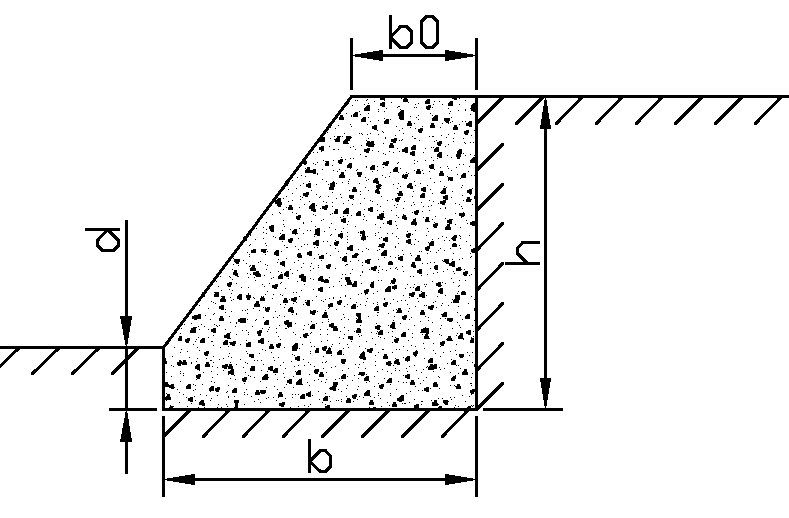

In [2]:
import numpy as np

In [70]:
# Muro de Contenção de Concreto - Rotina de Análise

# Muro de Concreto
# Perfil Trapezoidal

# Características do muro
y_w = 25 # peso específico do material kN/m3
h = 6.5 # m
b = 3.8 # m
b0 = 0.8 # m
d = 0 # m

# Características do solo
y_nat = 16 # kN/m3
phi = 30 # °
c = 0 # kPa

ka = np.tan(np.radians(45-(phi*0.5)))**2 # Fator de empuxo ativo do solo
kp = np.tan(np.radians(45+(phi*0.5)))**2 # Fator de empuxo passivio do solo

f = np.tan(np.radians(phi)) # Fator de atrito da fundação
q_adm = 300 # Tensão de ruptura da fundação em kN/m2

# Fatores de segurança mínimos
FSt_adm = 1.5
FSe_adm = 1.5
FSr_adm = 2.5

# ------------------------------Rotina de cálculo-------------------------------
# Parcelas do perfil do muro
A1 = d*b
y1 = b/2

A2 = (h-d)*b0
y2 = b-(b0*0.5)

A3 = (b-b0)*(h-d)*0.5
y3 = (b-b0)*(2/3)

# Peso e centro de massa do muro
W = (A1+A2+A3)*y_w
xw = ((A1*y1)+(A2*y2)+(A3*y3))/(A1+A2+A3)


# Empuxo

# Empuxo ativo
# Tensão Vertical
sigma_v0 = 0
sigma_v1 = y_nat*h

# Tensão Horizontal
sigma_h0 = (ka*sigma_v0)-(2*c*np.sqrt(ka))
sigma_h1 = (ka*sigma_v1)-(2*c*np.sqrt(ka))

# Altura Crítica
z_crit = (2*c*ka)/(y_nat*ka)
print(f'Altua Crítica = {z_crit} m')

# Empuxo Ativo e ponto de aplicação
Ea = (h-z_crit)*sigma_h1*0.5
ya = (h-z_crit)/3


# Empuxo passivo
# Tensão Vertical
sigma_v0 = 0
sigma_v1 = y_nat*d

# Tensão Horizontal
sigma_h0 = (kp*sigma_v0)+(2*c*np.sqrt(kp))
sigma_h1 = (kp*sigma_v1)+(2*c*np.sqrt(kp))

# Empuxo Passivo e ponto de aplicação
Ep = (sigma_h0+sigma_h1)*d*0.5
yp = ((sigma_h0*d*d*0.5)+(((sigma_h1-sigma_h0)*d*0.5)*(d/3)))/Ep if Ep != 0 else 0


# Verificações de estabilidade
# Estabilidade ao tombamento
FSt = np.round(((W*xw)+(Ep*yp))/(Ea*ya),2)

# Estabilidade ao escorregamento
FSe = np.round(((W*f)+Ep)/Ea,2)

# Estabilidade à ruptura da fundação
e_ = ((W*xw)+(Ep*yp)-(Ea*ya))/W

if (e_ < b/3) or (e_ > (2/3)*b):
    q = (2*W)/(3*e_)
else:
    e = (b*0.5) - e_
    q = (W/b)*(1+((6*e)/b))

FSr = np.round(q_adm/q,2)

# Resultados
print(f'Estabilidade ao tombamento FS = {FSt} ' + (f'≥ {FSt_adm} - Estável' if FSt >=FSt_adm else f'< {FSt_adm} - Instável'))
print(f'Estabilidade ao escorregamento FS = {FSe} ' + (f'≥ {FSe_adm} - Estável' if FSe >=FSe_adm else f'< {FSe_adm} - Instável'))
print(f'Estabilidade à ruptura da fundação FS = {FSr} ' + (f'≥ {FSr_adm} - Estável' if FSr >=FSr_adm else f'< {FSr_adm} - Instável'))

Altua Crítica = 0.0 m
Estabilidade ao tombamento FS = 3.81 ≥ 1.5 - Estável
Estabilidade ao escorregamento FS = 1.92 ≥ 1.5 - Estável
Estabilidade à ruptura da fundação FS = 2.76 ≥ 2.5 - Estável
